References: 

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651

https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/

In [707]:
#Importing the basic needed libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Try1

Look into null values, drop or impute. Use one hot encoding on categorical features. Use Linear Regression without tuning.

In [562]:
# Read data for Linear Regression from csv

df=pd.read_csv("LR\\train.csv")

In [563]:
# Getting an overview of dataframe

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Handling Null Values

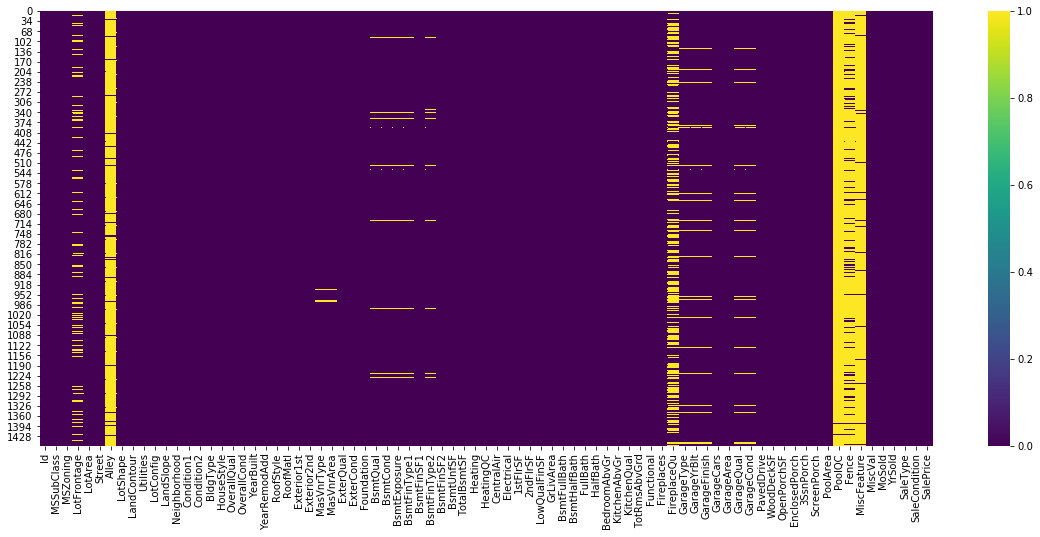

In [564]:
# Trying to get an approx. idea how many columns have a major amount of missing data

fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [565]:
# Want to have a look at all the 81 rows, therefore using this setting

pd.options.display.max_rows = 81    #default=15
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [566]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

In [567]:
df['LotFrontage'].value_counts()
df['LotFrontage'] = df['LotFrontage'].fillna(60.0)
df['LotFrontage'].isnull().sum()

0

In [568]:
df['MasVnrType'].value_counts()
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].isnull().sum()

0

In [569]:
df['MasVnrArea'].value_counts()
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].isnull().sum()

0

In [570]:
df['BsmtQual'].value_counts()
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtQual'].isnull().sum()

0

In [571]:
df['BsmtCond'].value_counts()
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtCond'].isnull().sum()

0

In [572]:
df['BsmtExposure'].value_counts()
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtExposure'].isnull().sum()

0

In [573]:
df['BsmtFinType2'].value_counts()
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['BsmtFinType2'].isnull().sum()

0

In [574]:
df['Electrical'].value_counts()
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'].isnull().sum()

0

In [575]:
df['GarageType'].value_counts()
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageType'].isnull().sum()

0

In [576]:
yr=df['GarageYrBlt'].mode()
yr

0    2005.0
dtype: float64

In [577]:
df['GarageYrBlt'].value_counts()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2005.0)
df['GarageYrBlt'].isnull().sum()

0

In [578]:
df['GarageFinish'].value_counts()
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageFinish'].isnull().sum()

0

In [579]:
df['GarageQual'].value_counts()
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageQual'].isnull().sum()

0

In [580]:
df['GarageCond'].value_counts()
df['GarageCond'] = df['GarageCond'].fillna('TA')
df['GarageCond'].isnull().sum()

0

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

# Handling categorical data

In [582]:
for col in df.columns:
    if(df.dtypes[col]=='O'):
        print(col,'\t',df[col].value_counts().count())

MSZoning 	 5
Street 	 2
LotShape 	 4
LandContour 	 4
Utilities 	 2
LotConfig 	 5
LandSlope 	 3
Neighborhood 	 25
Condition1 	 9
Condition2 	 8
BldgType 	 5
HouseStyle 	 8
RoofStyle 	 6
RoofMatl 	 8
Exterior1st 	 15
Exterior2nd 	 16
MasVnrType 	 4
ExterQual 	 4
ExterCond 	 5
Foundation 	 6
BsmtQual 	 4
BsmtCond 	 4
BsmtExposure 	 4
BsmtFinType2 	 6
Heating 	 6
HeatingQC 	 5
CentralAir 	 2
Electrical 	 5
KitchenQual 	 4
Functional 	 7
GarageType 	 6
GarageFinish 	 3
GarageQual 	 5
GarageCond 	 5
PavedDrive 	 3
SaleType 	 9
SaleCondition 	 6


In [583]:
for col in df.columns:
    if(df.dtypes[col]=='O'):
        print(df[col].value_counts(),'\n','*****************')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
 *****************
Pave    1454
Grvl       6
Name: Street, dtype: int64 
 *****************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 
 *****************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 
 *****************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 
 *****************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 
 *****************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
 *****************
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV  

In [584]:
new_cols={}
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
        new_cols[col+'_cols'] = pd.get_dummies(df[col], prefix=col, drop_first=True)
for col in new_cols.keys():        
    df = pd.concat([df,new_cols[col]],axis=1)
df.drop(drop_cols,axis=1,inplace=True)





In [585]:
for x in df.columns:
    print(x)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborh

In [586]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

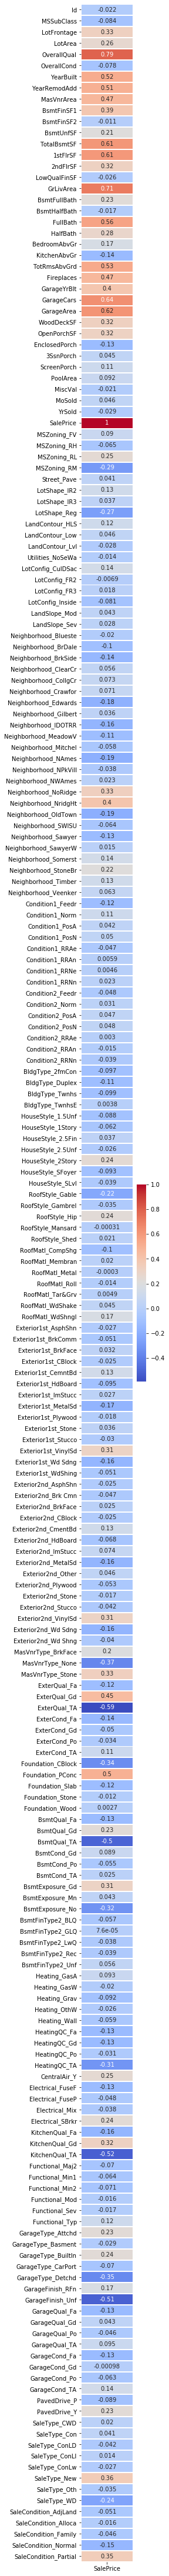

In [587]:
#Using corr matrix
fig, ax = plt.subplots(figsize=(2,80))
sns.heatmap(df.corr()[['SalePrice']],linecolor='white',linewidths=1,cmap='coolwarm',annot=True)

# Using Linear Regression

In [588]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [589]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [590]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [591]:
lm=LinearRegression()

In [592]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [593]:
predictions = lm.predict(X_test)

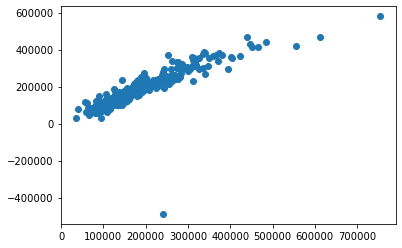

In [594]:
plt.scatter(y_test,predictions)

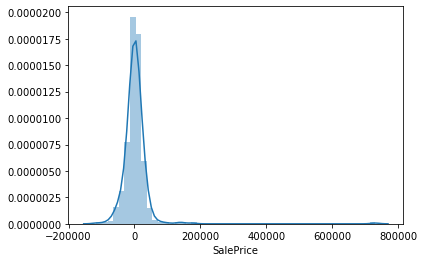

In [595]:
sns.distplot((y_test-predictions),bins=50);

In [596]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19167.28400123857
MSE: 1914396561.8329122
RMSE: 43753.81768295096


In [597]:
metrics.r2_score(y_test, predictions)

0.7256562282741212

# Try2:  

Modify and take only the features having certain correlation from the same dataframe

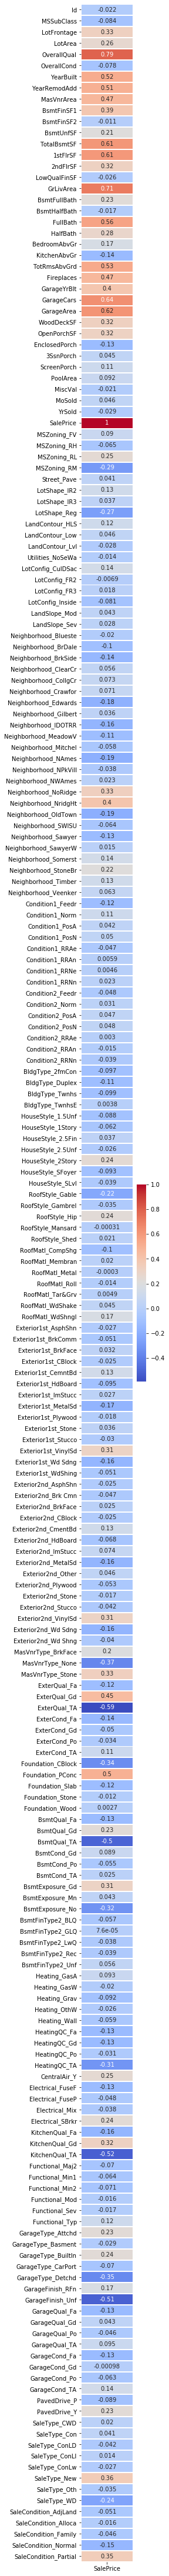

In [599]:
fig, ax = plt.subplots(figsize=(2,80))
sns.heatmap(df.corr()[['SalePrice']],linecolor='white',linewidths=1,cmap='coolwarm',annot=True)

In [600]:
df.corr()['SalePrice']['Id']

-0.021916719443431112

In [601]:
col_list=[]
cor=df.corr()
for col in cor.columns:
    if (cor['SalePrice'][col]>0.1 or cor['SalePrice'][col]<-0.1):
        col_list.append(col)
        

In [602]:
df[col_list]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageCond_Fa,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,1,0,0,0,1,1,0,1,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,1,0,0,0,1,1,0,1,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,1,0,0,0,1,1,0,1,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,1,0,0,1,1,0,1,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,1,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,1,0,0,0,1,1,0,1,1,0
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,0,1,0,0,1,1,0,1,1,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,1,0,0,0,1,1,0,1,1,0
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,0,1,0,0,1,1,0,1,1,0


In [603]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

lm2=LinearRegression()
lm2.fit(X_train,y_train)

predictions = lm2.predict(X_test)

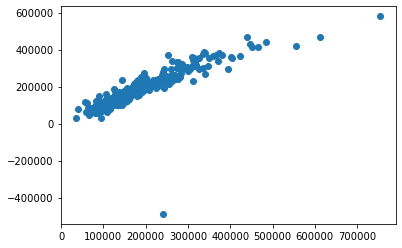

In [604]:
plt.scatter(y_test,predictions)

In [605]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19167.28400123857
MSE: 1914396561.8329122
RMSE: 43753.81768295096


In [606]:
metrics.r2_score(y_test, predictions)

0.7256562282741212

# Try3: 

Dropping all the Null Vals

In [607]:
# Read data for Linear Regression from csv

df=pd.read_csv("LR\\train.csv")

In [608]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

In [609]:
df.dropna(inplace=True)

new_cols={}
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
        new_cols[col+'_cols'] = pd.get_dummies(df[col], prefix=col, drop_first=True)
for col in new_cols.keys():        
    df = pd.concat([df,new_cols[col]],axis=1)
df.drop(drop_cols,axis=1,inplace=True)


In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Columns: 218 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(180)
memory usage: 525.6 KB


In [611]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

lm3=LinearRegression()
lm3.fit(X_train,y_train)

predictions = lm3.predict(X_test)

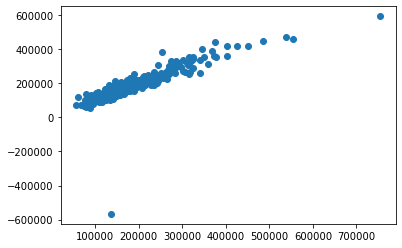

In [612]:
plt.scatter(y_test,predictions)

In [613]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21551.528502700705
MSE: 2225456445.34196
RMSE: 47174.74372311905


In [614]:
metrics.r2_score(y_test, predictions)

0.6820340619492833

# Try4: 

Taking only numerical features

In [615]:
df=pd.read_csv("LR\\train.csv")

In [616]:
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
df.drop(drop_cols,axis=1,inplace=True)

In [617]:
df.dropna(inplace=True)

In [618]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [619]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

lm4=LinearRegression()
lm4.fit(X_train,y_train)

predictions = lm4.predict(X_test)

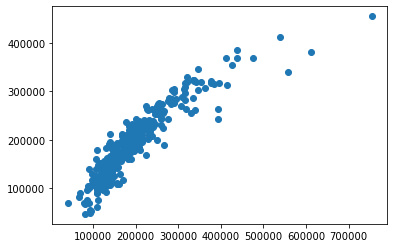

In [620]:
plt.scatter(y_test,predictions)

In [621]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 23983.945312603646
MSE: 1453641251.1242766
RMSE: 38126.647520130544


In [622]:
metrics.r2_score(y_test, predictions)

0.8181008276852454

# Try5:

Removing skewness and taking all features and not dropping null values.

In [623]:
df=pd.read_csv("LR\\train.csv")
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

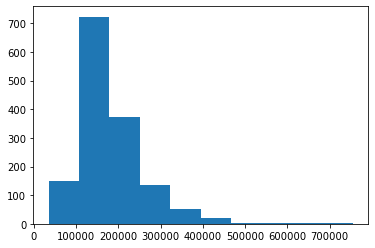

In [624]:
plt.hist(df['SalePrice'])

In [625]:
df['SalePrice'] = np.log1p(df['SalePrice'])

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

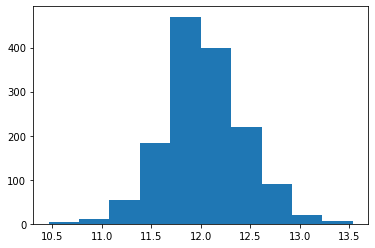

In [626]:
plt.hist(df['SalePrice'])

In [627]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

df['LotFrontage'].value_counts()
df['LotFrontage'] = df['LotFrontage'].fillna(60.0)
df['LotFrontage'].isnull().sum()

df['MasVnrType'].value_counts()
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].isnull().sum()

df['MasVnrArea'].value_counts()
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].isnull().sum()

df['BsmtQual'].value_counts()
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtQual'].isnull().sum()

df['BsmtCond'].value_counts()
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtCond'].isnull().sum()

df['BsmtExposure'].value_counts()
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtExposure'].isnull().sum()

df['BsmtFinType2'].value_counts()
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['BsmtFinType2'].isnull().sum()

df['Electrical'].value_counts()
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'].isnull().sum()

df['GarageType'].value_counts()
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageType'].isnull().sum()

yr=df['GarageYrBlt'].mode()
yr

df['GarageYrBlt'].value_counts()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2005.0)
df['GarageYrBlt'].isnull().sum()

df['GarageFinish'].value_counts()
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageFinish'].isnull().sum()

df['GarageQual'].value_counts()
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageQual'].isnull().sum()

df['GarageCond'].value_counts()
df['GarageCond'] = df['GarageCond'].fillna('TA')
df['GarageCond'].isnull().sum()

0

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [629]:
new_cols={}
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
        new_cols[col+'_cols'] = pd.get_dummies(df[col], prefix=col, drop_first=True)
for col in new_cols.keys():        
    df = pd.concat([df,new_cols[col]],axis=1)
df.drop(drop_cols,axis=1,inplace=True)





In [630]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

lm5=LinearRegression()
lm5.fit(X_train,y_train)

predictions = lm5.predict(X_test)

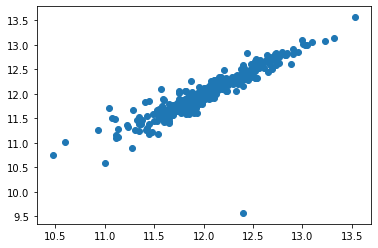

In [631]:
plt.scatter(y_test,predictions)

In [632]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.094443688313606
MSE: 0.03419068215602609
RMSE: 0.18490722580804161


In [633]:
metrics.r2_score(y_test, predictions)

0.7984562147794098

# Try6: 

Using ridge by taking all features and not dropping null values by first removing skewness

In [634]:
df=pd.read_csv("LR\\train.csv")
df.columns

df['SalePrice'] = np.log1p(df['SalePrice'])



df.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

df['LotFrontage'].value_counts()
df['LotFrontage'] = df['LotFrontage'].fillna(60.0)
df['LotFrontage'].isnull().sum()

df['MasVnrType'].value_counts()
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].isnull().sum()

df['MasVnrArea'].value_counts()
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].isnull().sum()

df['BsmtQual'].value_counts()
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtQual'].isnull().sum()

df['BsmtCond'].value_counts()
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtCond'].isnull().sum()

df['BsmtExposure'].value_counts()
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtExposure'].isnull().sum()

df['BsmtFinType2'].value_counts()
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['BsmtFinType2'].isnull().sum()

df['Electrical'].value_counts()
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'].isnull().sum()

df['GarageType'].value_counts()
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageType'].isnull().sum()

yr=df['GarageYrBlt'].mode()
yr

df['GarageYrBlt'].value_counts()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2005.0)
df['GarageYrBlt'].isnull().sum()

df['GarageFinish'].value_counts()
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageFinish'].isnull().sum()

df['GarageQual'].value_counts()
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageQual'].isnull().sum()

df['GarageCond'].value_counts()
df['GarageCond'] = df['GarageCond'].fillna('TA')
df['GarageCond'].isnull().sum()



new_cols={}
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
        new_cols[col+'_cols'] = pd.get_dummies(df[col], prefix=col, drop_first=True)
for col in new_cols.keys():        
    df = pd.concat([df,new_cols[col]],axis=1)
df.drop(drop_cols,axis=1,inplace=True)





from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [635]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'max_iter': 60000}
ridge = Ridge(**params)
grid = GridSearchCV(ridge, refit=True,scoring='neg_mean_squared_error',param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},verbose=True)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=60000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [636]:
grid_predictions = grid.best_estimator_.predict(X_test)

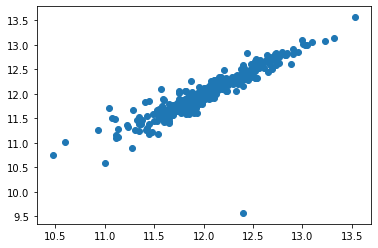

In [637]:
plt.scatter(y_test,predictions)

In [638]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

metrics.r2_score(y_test, predictions)

MAE: 0.094443688313606
MSE: 0.03419068215602609
RMSE: 0.18490722580804161


0.7984562147794098

# Try7:
Skewness removed but  just numerical features

In [708]:
df=pd.read_csv("LR\\train.csv")
df.columns

df['SalePrice'] = np.log1p(df['SalePrice'])



df.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

df['LotFrontage'].value_counts()
df['LotFrontage'] = df['LotFrontage'].fillna(60.0)
df['LotFrontage'].isnull().sum()

df['MasVnrType'].value_counts()
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].isnull().sum()

df['MasVnrArea'].value_counts()
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].isnull().sum()

df['BsmtQual'].value_counts()
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtQual'].isnull().sum()

df['BsmtCond'].value_counts()
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtCond'].isnull().sum()

df['BsmtExposure'].value_counts()
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtExposure'].isnull().sum()

df['BsmtFinType2'].value_counts()
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['BsmtFinType2'].isnull().sum()

df['Electrical'].value_counts()
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'].isnull().sum()

df['GarageType'].value_counts()
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageType'].isnull().sum()

yr=df['GarageYrBlt'].mode()
yr

df['GarageYrBlt'].value_counts()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2005.0)
df['GarageYrBlt'].isnull().sum()

df['GarageFinish'].value_counts()
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageFinish'].isnull().sum()

df['GarageQual'].value_counts()
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageQual'].isnull().sum()

df['GarageCond'].value_counts()
df['GarageCond'] = df['GarageCond'].fillna('TA')
df['GarageCond'].isnull().sum()



new_cols={}
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
df.drop(drop_cols,axis=1,inplace=True)







In [709]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

lm6=LinearRegression()
lm6.fit(X_train,y_train)

predictions = lm6.predict(X_test)

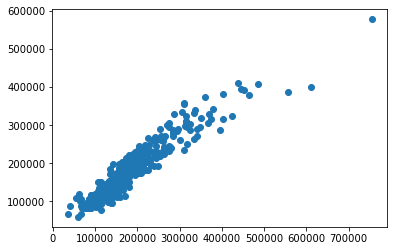

In [710]:
plt.scatter(np.expm1(y_test),np.expm1(predictions))

In [711]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

metrics.r2_score(y_test, predictions)

MAE: 0.1090706352624615
MSE: 0.02219425747488932
RMSE: 0.14897737235865494


0.8691715292126398

# Try8: 
Using ridge,skewness removed on just numerical

In [715]:
df=pd.read_csv("LR\\train.csv")
df.columns

df['SalePrice'] = np.log1p(df['SalePrice'])



df.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

df['LotFrontage'].value_counts()
df['LotFrontage'] = df['LotFrontage'].fillna(60.0)
df['LotFrontage'].isnull().sum()



df['MasVnrArea'].value_counts()
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].isnull().sum()



yr=df['GarageYrBlt'].mode()
yr

df['GarageYrBlt'].value_counts()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2005.0)
df['GarageYrBlt'].isnull().sum()




new_cols={}
drop_cols=[]
for col in df.columns:
    if(df.dtypes[col]=='O'):
        drop_cols.append(col)
df.drop(drop_cols,axis=1,inplace=True)


from sklearn.model_selection import train_test_split

X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'max_iter': 60000}
ridge = Ridge(**params)
grid = GridSearchCV(ridge, refit=True,scoring='neg_mean_squared_error',param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},verbose=True)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=60000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [716]:
predictions=grid.best_estimator_.predict(X_test)

In [717]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

metrics.r2_score(y_test, predictions)

MAE: 0.10907056023858637
MSE: 0.022194247344304367
RMSE: 0.1489773383582361


0.8691715889293905

### Using this last model

In [718]:
df_test=pd.read_csv('LR\\test.csv')


In [719]:
df_test.drop(['Alley','PoolQC','Fence','MiscFeature','BsmtFinType1','FireplaceQu'],axis=1,inplace=True)

df_test['LotFrontage'].value_counts()
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(60.0)
df_test['LotFrontage'].isnull().sum()



df_test['MasVnrArea'].value_counts()
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['MasVnrArea'].isnull().sum()



df_test['GarageYrBlt'].value_counts()
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(2005.0)
df_test['GarageYrBlt'].isnull().sum()




new_cols={}
drop_cols=[]
for col in df_test.columns:
    if(df_test.dtypes[col]=='O'):
        drop_cols.append(col)
df_test.drop(drop_cols,axis=1,inplace=True)


In [720]:
for col in df_test.columns:
    df_test[col]=df_test[col].fillna(df[col].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

In [721]:
predictions=grid.best_estimator_.predict(df_test)

In [722]:
predictions

array([11.6690823 , 11.67183484, 12.02594196, ..., 12.05257137,
       11.57814479, 12.38917092])

In [723]:
predictions = np.expm1(predictions)

In [724]:
predictions

array([116899.95334077, 117222.17064538, 167031.21228177, ...,
       171538.93372563, 106738.310642  , 240185.48357528])

In [703]:
df_fin=pd.read_csv('LR\\test.csv')
df_fin['SalePrice']=predictions

In [704]:
df_fin

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,116899.953341
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,117222.170645
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,167031.212282
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,194551.712794
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,179355.285429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90015.440041
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,93461.224446
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,171538.933726
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,106738.310642


(array([350., 622., 314., 119.,  34.,  15.,   4.,   0.,   0.,   1.]),
 array([ 56820.61328071, 123563.61053571, 190306.60779072, 257049.60504572,
        323792.60230073, 390535.59955574, 457278.59681074, 524021.59406575,
        590764.59132076, 657507.58857576, 724250.58583077]),
 <a list of 10 Patch objects>)

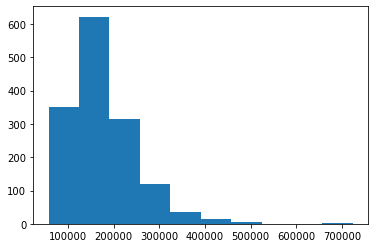

In [705]:
plt.hist(df_fin['SalePrice'])

In [706]:
df_fin.to_csv(path_or_buf='Fin_ans_LR',index=False)